In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
data = pd.read_csv('globalterrorism-ck.csv', encoding='ISO-8859-1')


C:\Users\chhot\AppData\Local\Temp\ipykernel_12476\4091226058.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('globalterrorism-ck.csv', encoding='ISO-8859-1')


In [3]:
# Step 3: Data Cleaning


In [4]:
# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values as appropriate
data = data.fillna({'nkill': 0, 'nwound': 0})

# For simplicity, let's focus on key columns
columns_of_interest = ['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city', 'latitude', 'longitude', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'nkill', 'nwound']
data = data[columns_of_interest]

        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  1.970000e+11   1970       7     2        NaN         0        NaN       58   
1  1.970000e+11   1970       0     0        NaN         0        NaN      130   
2  1.970010e+11   1970       1     0        NaN         0        NaN      160   
3  1.970010e+11   1970       1     0        NaN         0        NaN       78   
4  1.970010e+11   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY 

In [5]:
# Step 4: Exploratory Data Analysis
# Summary statistics
print(data.describe())


               iyear         imonth           iday       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045      18.569242   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.510046   
50%      2009.000000       6.000000      15.000000      31.467463   
75%      2014.000000       9.000000      23.000000      34.685087   
max      2017.000000      12.000000      31.000000      74.633553   

          longitude          nkill         nwound  
count  1.771340e+05  181691.000000  181691.000000  
mean  -4.586957e+02       2.266860       2.883296  
std    2.047790e+05      11.227057      34.309747  
min   -8.618590e+07       0.000000       0.000000  
25%    4.545640e+00       0.000000       0.000000  
50%    4.324651e+01       0.000000       0.000000  
75%    6.87103

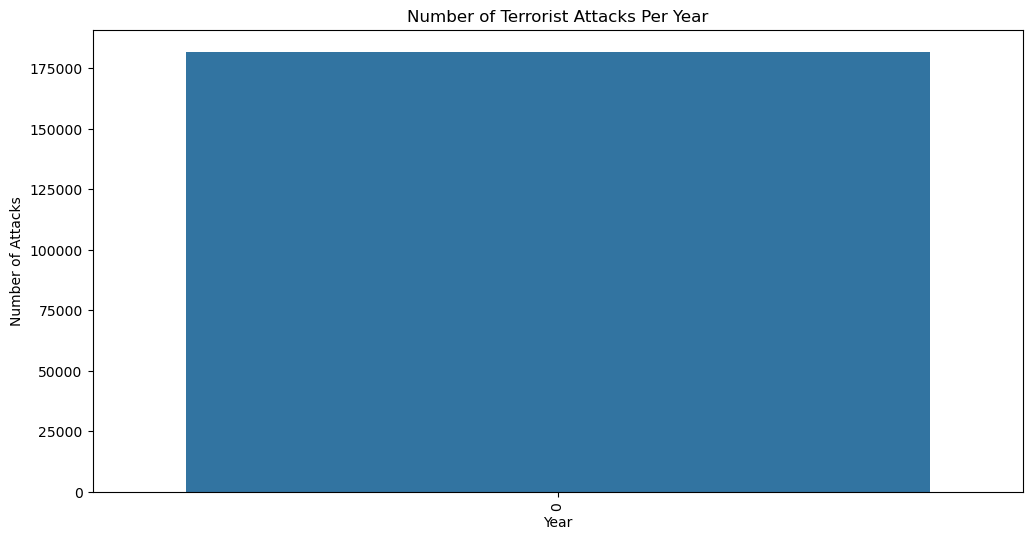

In [6]:
 # step 4.2 Temporal Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Plot number of attacks per year
plt.figure(figsize=(12, 6))
sns.countplot(data['iyear'])
plt.title('Number of Terrorist Attacks Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()

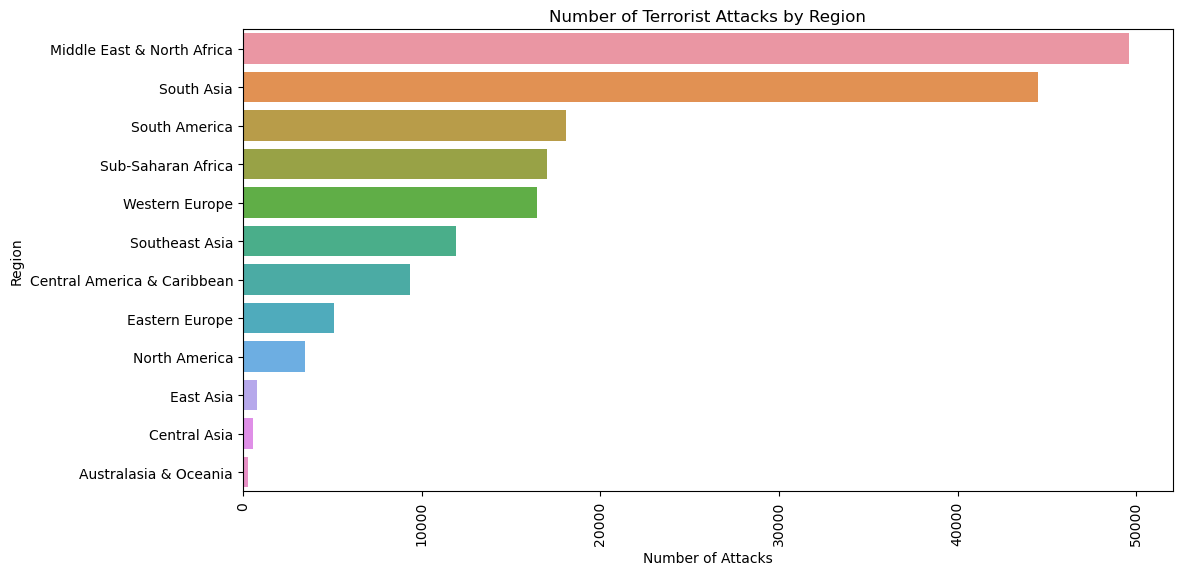

In [11]:
# Geographical analysis with seaborn and matplotlib
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='region_txt', order=data['region_txt'].value_counts().index)
plt.title('Number of Terrorist Attacks by Region')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.xticks(rotation=90)
plt.show()

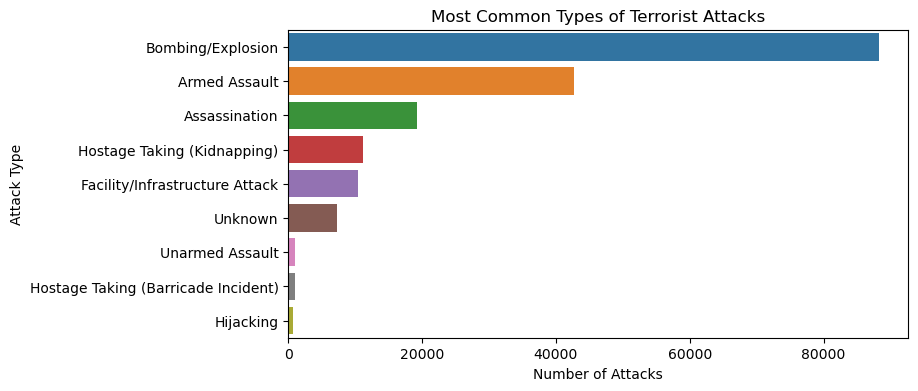

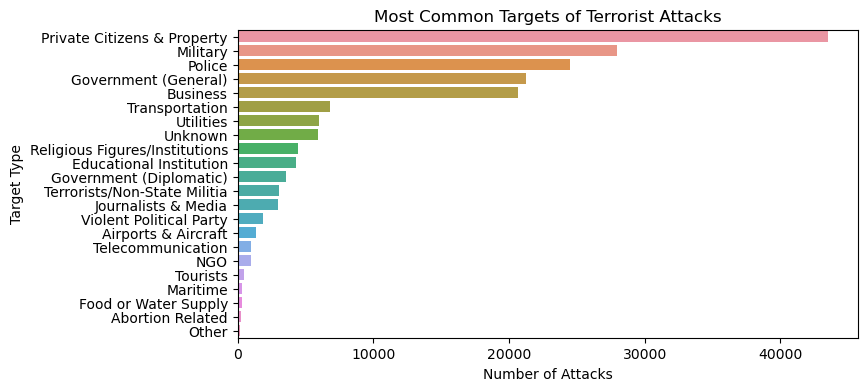

In [7]:
# Attack types and targets
plt.figure(figsize=(8, 4))
sns.countplot(y=data['attacktype1_txt'], order=data['attacktype1_txt'].value_counts().index)
plt.title('Most Common Types of Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(y=data['targtype1_txt'], order=data['targtype1_txt'].value_counts().index)
plt.title('Most Common Targets of Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Target Type')
plt.show()




C:\Users\chhot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


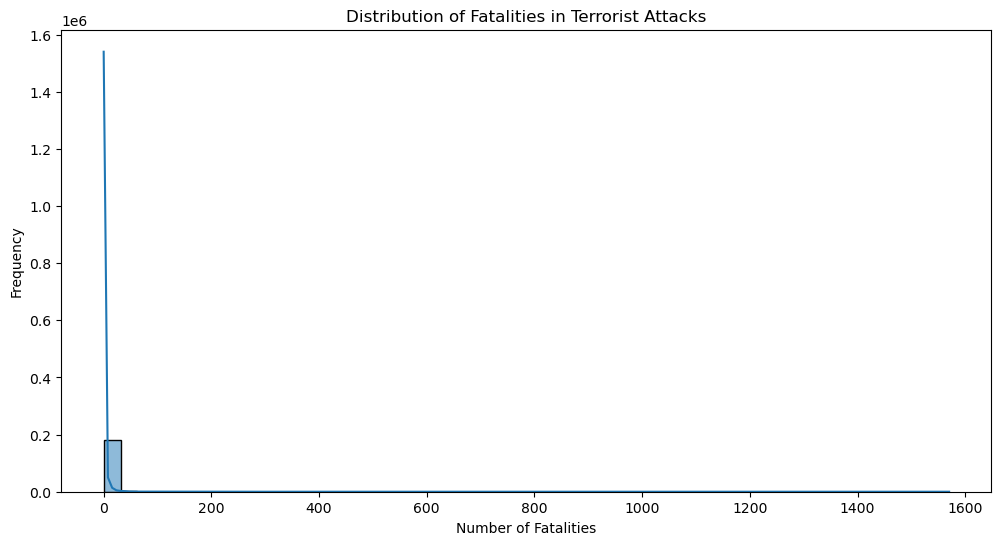

C:\Users\chhot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


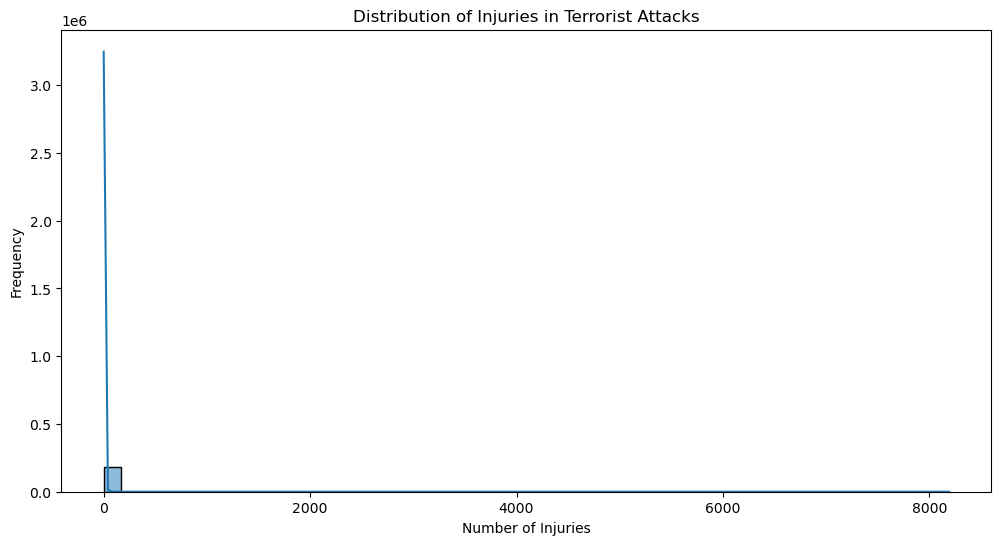

In [8]:
# Fatalities and injuries analysis
plt.figure(figsize=(12, 6))
sns.histplot(data['nkill'], bins=50, kde=True)
plt.title('Distribution of Fatalities in Terrorist Attacks')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['nwound'], bins=50, kde=True)
plt.title('Distribution of Injuries in Terrorist Attacks')
plt.xlabel('Number of Injuries')
plt.ylabel('Frequency')
plt.show()